# Related to figure 4h-i

In [2]:
suppressMessages({library(glue)
library(Seurat)
library(dplyr)
library(ggplot2)
library(stringr)
library(pheatmap)
library(RColorBrewer)
library(ggpubr)})

In [3]:
obj <- readRDS('/data/yuchen_data/Stereo_seq/All_Figures/Figure3/1.data/Merged_NaiveB.rds')
obj$Group = paste0('C', as.character(obj$seurat_clusters))
obj$Group <- factor(obj$Group, levels=c('C0', 'C1'))

colors <- c('#00a5cf', '#FB5607')

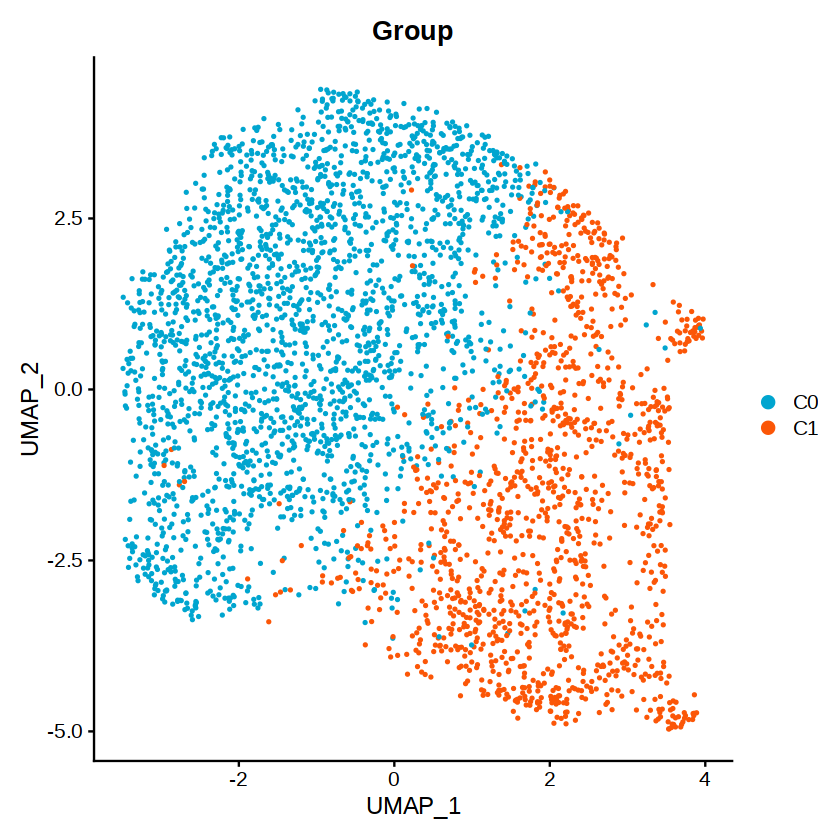

In [4]:
DimPlot(obj, group.by='Group', cols=colors)

Warning message:
“The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4.”
Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


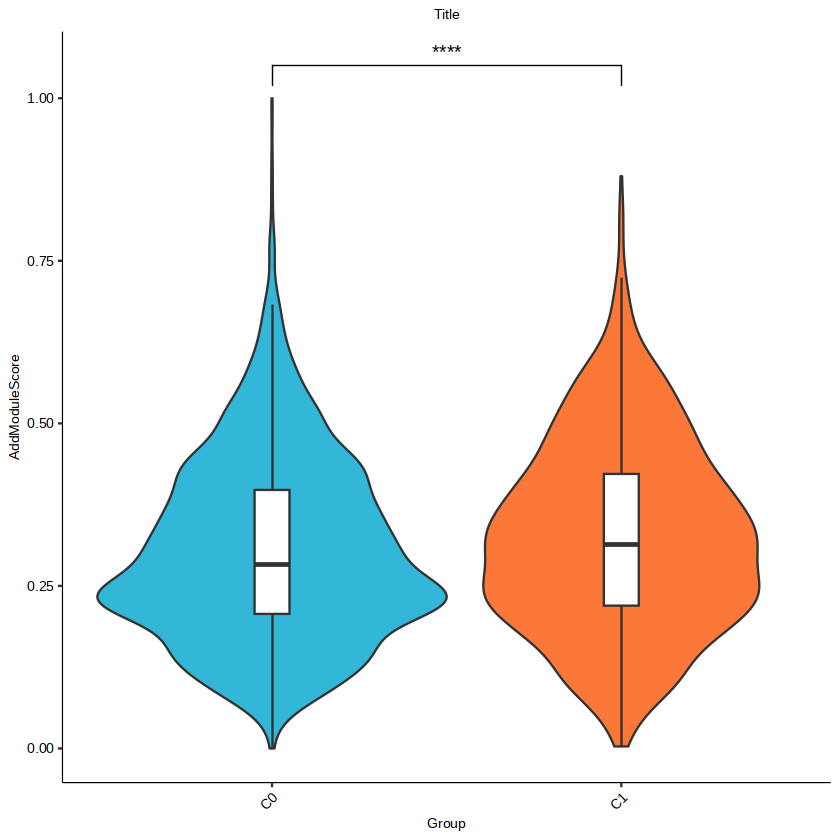

In [5]:
# 作比较的组
mylist <- list(c('C0', 'C1'))

# 画图值的列以及分组的列
plot_item = 'KEGG_TRYPTOPHAN_METABOLISM.addmodulescore'
group_item = 'Group'

df_plot1 <- obj@meta.data
df_plot1$plot = df_plot1[[plot_item]]
df_plot1$groupby = df_plot1[[group_item]]

df_plot1$plot = (df_plot1$plot - min(df_plot1$plot)) / (max(df_plot1$plot) - min(df_plot1$plot))



ggplot(df_plot1, aes(groupby,plot ,fill=groupby))+
    geom_violin(width=1)+
    scale_fill_manual(limits=c("C0", "C1"), values=alpha(c('#00a5cf', '#FB5607'), 0.8))+ #颜色
    stat_compare_means(comparisons=mylist, label="p.format",method = 'wilcox.test', symnum.args=list(cutpoints = c(0, 0.0001, 0.001, 0.01, 0.05, 1),symbols = c("****", "***", "**", "*", "ns"))) +
    guides(fill=FALSE) +
    geom_boxplot(width=0.1, fill="white", outlier.alpha=0)+
    labs(title = 'Title',x = 'Group',y = 'AddModuleScore' ) +
    theme(
    plot.title    = element_text(color = 'black', size   = 8, hjust = 0.5),
    plot.subtitle = element_text(color = 'black', size   = 8,hjust = 0.5),
    plot.caption  = element_text(color = 'black', size   = 8,face = 'italic', hjust = 1),
    axis.text.x   = element_text(color = 'black', size = 8, angle = 45,hjust = 1),#
    axis.text.y   = element_text(color = 'black', size = 8, angle = 0),
    axis.title.x  = element_text(color = 'black', size = 8, angle = 0),
    axis.title.y  = element_text(color = 'black', size = 8, angle = 90),
    legend.title  = element_text(color = 'black', size  = 8),
    legend.text   = element_text(color = 'black', size   = 8),
    axis.line.y = element_line(color = 'black', linetype = 'solid', size = 0.25), # y轴线特征
    axis.line.x = element_line (color = 'black',linetype = 'solid', size = 0.25), # x轴线特征
    panel.background=element_rect(fill="white")
    )
